In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Exploratory Data Analysis

## IRIS data

First, we load the data and inspect it

In [2]:
iris = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/IRIS.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We'll start by making scatterplots comparing petal and sepal length and width for each of the species in the dataset. We can color code by species to see how they compare.

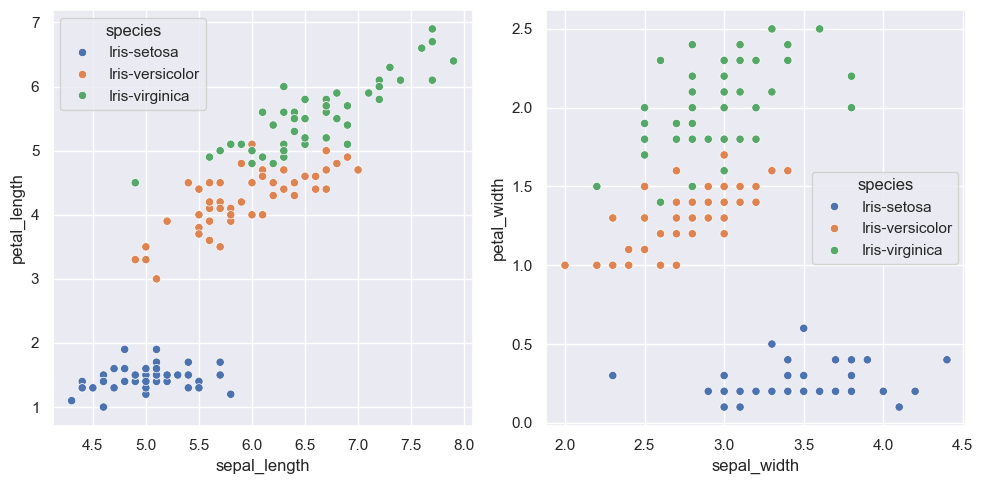

In [3]:
sns.set_theme()

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))

sns.scatterplot(data = iris, x = "sepal_length", y = "petal_length", hue = "species", ax = ax1)
sns.scatterplot(data = iris, x = "sepal_width", y = "petal_width", hue = "species",ax = ax2)

fig.tight_layout()

We can easily see that the overall size of petals and sepals increases from the species Setosa to Versicolor to Virginica, with the one exception that the sepal width of Setosa tends to be bigger than the other species'. When it comes to the relationship between length and width for petals and sepals for each species, we can see:
- Setosa has no clear correlation between width or length for their petals or sepals. Petal width/length doesn't tend to increase or decrease with a change in sepal width/length
- Versicolor and Virginical both have clear correlation between petal length and sepal length, and seem to have less correlation, though still a noticable one, for petal and sepal width.

To see exactly how our variables are distributed, we will use a boxplot, again color-coded by species.

<Axes: xlabel='species', ylabel='petal_length'>

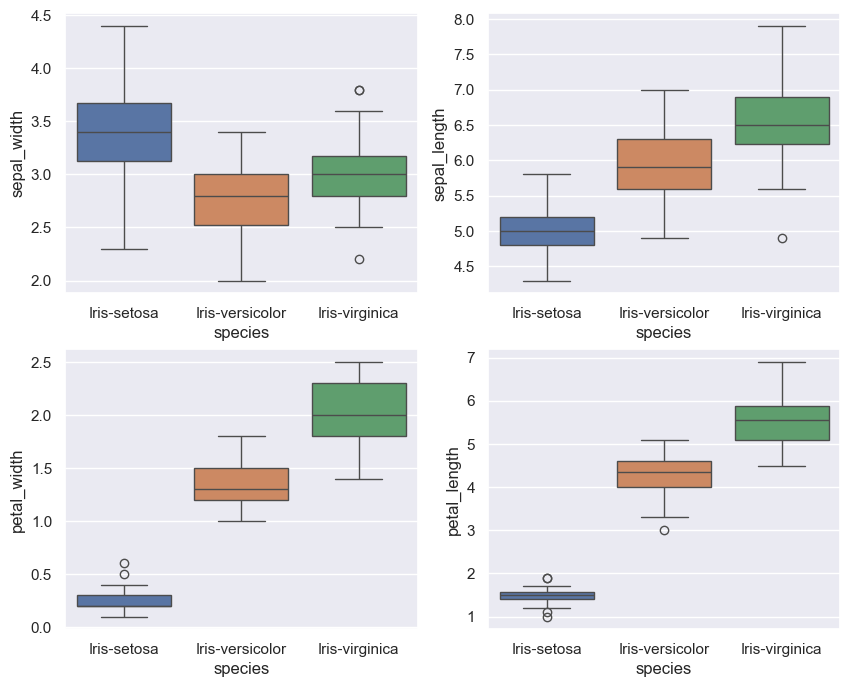

In [4]:
fig, axs = plt.subplots(2,2, figsize = (10,8))
sns.boxplot(data = iris, x = "species", y = "sepal_width", hue = "species", ax = axs[0,0])
sns.boxplot(data = iris, x = "species", y = "sepal_length", hue = "species", ax = axs[0,1])
sns.boxplot(data = iris, x = "species", y = "petal_width", hue = "species", ax = axs[1,0])
sns.boxplot(data = iris, x = "species", y = "petal_length", hue = "species", ax = axs[1,1])


In the bottom two plots we see more clearly that Setosa has quite consistant petal sizes compared to the other species. We also see the same size relationship as in the scatterplots, that Virginica is bigger than Versicolor, and both of them are bigger that Setosa, except for sepal width. We can see that this relationship holds for each variable.

Lastly, to analyse the realtionship between all the values, we make a pairplot.

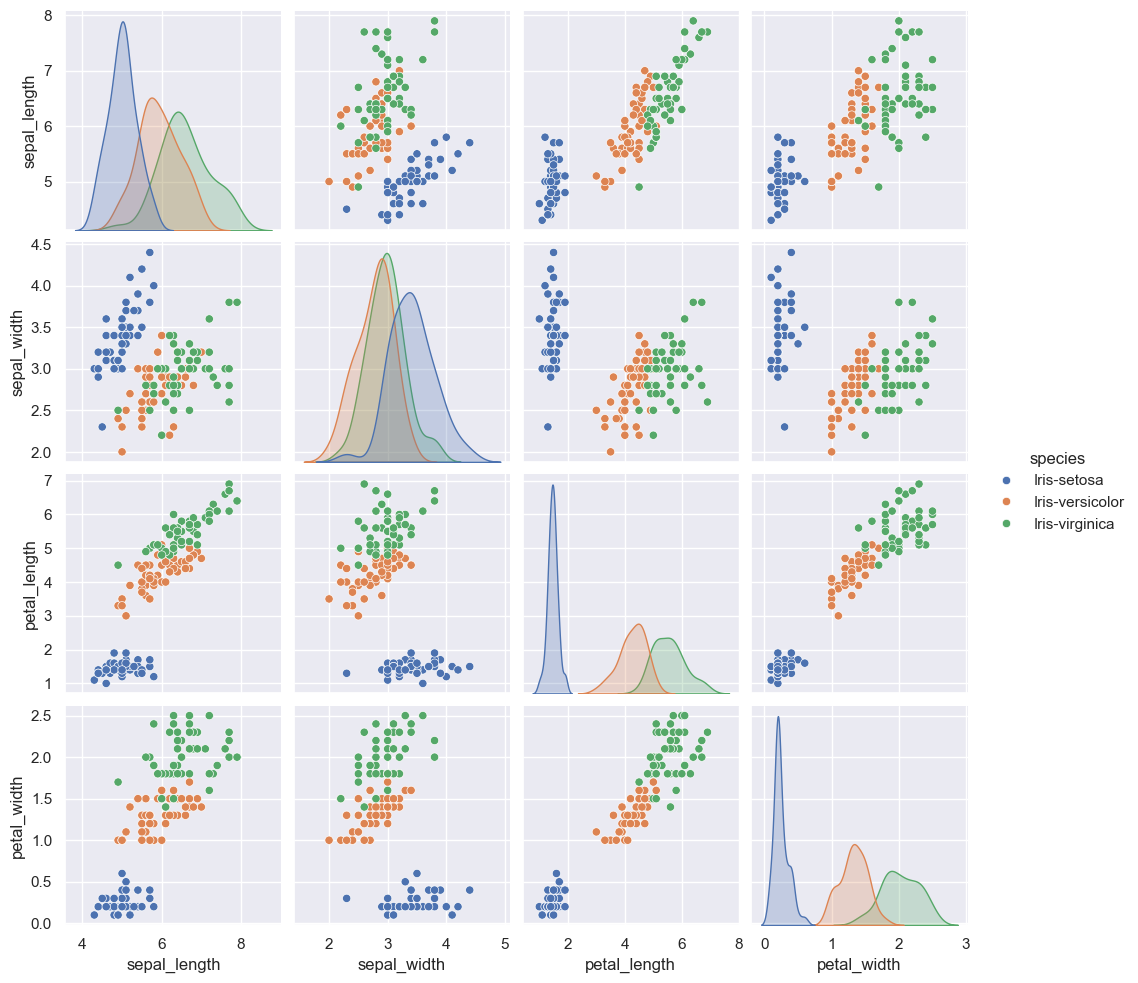

In [5]:
sns.pairplot(data = iris, hue ="species")

Here we can see relationshipslength and width of sepals and petals, which we did not have in the original scatterplots. Now we can see that length and width are correlated for petals and sepals for all species. The other relationships are as discussed earlier - Setosa has no relationship between its sepals and petals, but the other two species do have a correlation between them, and are a good bit larger that Setosa.

## Birdwatching

To start with, let's load the data and look at what variables we have access to.

In [6]:
art = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/artportalen.csv")
art.columns

Index(['Id', 'Taxonsorteringsordning', 'Rödlistade', 'Artnamn',
       'Vetenskapligt namn', 'Auktor', 'Antal', 'Ålder/stadium', 'Kön',
       'Aktivitet', 'Lokalnamn', 'Ostkoordinat', 'Nordkoordinat',
       'Noggrannhet', 'Diffusion', 'Län', 'Kommun', 'Provins', 'Församling',
       'Startdatum', 'Starttid', 'Slutdatum', 'Sluttid', 'Kommentar', 'Biotop',
       'Rapportör', 'Observatörer'],
      dtype='object')

To answer which species is most prevalent, the two relevant columns in our data is `"Artnamn"` (Species) and `"Antal"` (Amount). Before we calculate the amount of birds sighted, we must look at the values `"Antal"` has. We use the `"unique()` function to see all unique values present. 

In [7]:
art["Antal"].unique()

array(['2', '1', '10', '5', '6', '3', '7', '30', '8', '4', 'noterad',
       '100', '16', '222', '60', '18', '50', '12', '25', '20', '21',
       '600', '51', '80', '250', '200', '15', '11', '70', '71', '35',
       '3000', '67', '9', '26', '150', '40', '17', '14', '28', '1000',
       'Ej återfunnen', '13', '63', '22', '120', '138', '1100', '19',
       '42', '47', '23', '96', '85', '10000', '400', '45', '130', '82',
       '68', '34', '109', '122', '39', '41', '57', '49', '116', '125',
       '75', '81', '55', '43', '86', '156', '27', '235', '46', '115',
       '65', '110', '140', '141', '32', '123', '66', '145', '203', '168',
       '61', '24', '83', '119', '74', '38', '192', '88', '53', '33', '97',
       '52', '56', '44', '36', '37', '31', '185', '172', '108', '90',
       '300', '175', '95', '162', '54', '29', '270', '48', '225', '89',
       '155', '133', '72', '190', '124', '62', '107', '248', '408', '570'],
      dtype=object)

One thing we can see that not all values of `"Antal"`are numbers. For future analysis, we could either remove those values or replace them with ones, since we can assume at least one specimen was sighted. Since these are a small part of the data, and it will let us turn the column into  `int`s, we opt to remove them.

In [8]:
# Removes non-number values
art = art[ art["Antal"].str.contains(r"^[0-9]+$") ]
art = art.astype({"Antal" : int})
art.reset_index(inplace = True)

 Another thing we can see are a couple of unusually high values, as high as 10,000. We'll take a look at the ones larger than 1000.

In [9]:
art.loc[(art["Antal"] == 1000) | (art["Antal"] == 1100) | (art["Antal"] == 3000) | (art["Antal"] == 10000)]

,index,Id,Taxonsorteringsordning,Rödlistade,Artnamn,Vetenskapligt namn,Auktor,Antal,Ålder/stadium,Kön,...,Provins,Församling,Startdatum,Starttid,Slutdatum,Sluttid,Kommentar,Biotop,Rapportör,Observatörer
397,430,97878602,55458,NaN,Grönsiska,Spinus spinus,"(Linnaeus, 1758)",3000,NaN,NaN,...,Uppland,Stockholm,2022-01-03,12:55,2022-01-03,13:25,"Uppskattat antal när de lättade från alarna, h...",NaN,Svante Söderholm,Svante Söderholm
560,606,97897288,55458,NaN,Grönsiska,Spinus spinus,"(Linnaeus, 1758)",1000,NaN,NaN,...,Uppland,Stockholm,2022-01-04,09:40,2022-01-04,10:00,Västerut längs kanalen. Ett långt band.,NaN,Svante Söderholm,"Elisabeth Sturesson, Svante Söderholm"
902,966,97978935,55458,NaN,Grönsiska,Spinus spinus,"(Linnaeus, 1758)",1100,NaN,NaN,...,Uppland,Stockholm,2022-01-08,09:25,2022-01-08,09:40,ca 1100 ex.,NaN,Svante Söderholm,Svante Söderholm
1041,1111,98003125,55458,NaN,Grönsiska,Spinus spinus,"(Linnaeus, 1758)",10000,NaN,NaN,...,Uppland,Stockholm,2022-01-09,13:25,2022-01-09,13:40,"En magnifik flock, öronbedövande brus när en d...",NaN,Svante Söderholm,Svante Söderholm


All of these observations are of the same species, Grönsiska, and are all done by the same person, Svante Söderholm (And one other person for one of them.). They are also all from the span of one week, while the whole dataset spans six months. All this makes these observations potential outliers, so we'll have to treat them carefully moving forward. The following function will count the total number of specimens observed for each species, and dealing with especially high values by either capping them or changing them to one.

In [10]:
def totalBirds(df, max_val, minimize_large = 1):
    
    total = {}
    
    for i in range(len(df.index)):
        
        
        val = df["Antal"][i]
        # checks if the value is too large and handles it
        if val >= max_val:
            if minimize_large:
                val = 0
            else:
                val = max_val
                
        # adds the value to a dictionary
        if df["Artnamn"][i] in total.keys():
            total[df["Artnamn"][i]] += val
        else:
            total[df["Artnamn"][i]] = val

            
    # returns the dictionary as a (sorted) series
    return pd.Series(total).sort_values(ascending = False)

Now let's see if these observations skew the results. We'll do this by seeing the top result with and without the observations larger than 1000.

In [11]:
total_all = totalBirds(art,100000)
total_thou = totalBirds(art,1000)

In [12]:
total_all

Grönsiska         20211
Sothöna            8308
Gräsand            7167
Storskrake         6750
Vitkindad gås      6345
                  ...  
Ejder                 1
Lappsparv             1
Tornfalk              1
Forsärla              1
Bändelkorsnäbb        1
Length: 172, dtype: int32

In [13]:
total_thou

Sothöna           8308
Gräsand           7167
Storskrake        6750
Vitkindad gås     6345
Storskarv         5281
                  ... 
Ejder                1
Lappsparv            1
Tornfalk             1
Forsärla             1
Bändelkorsnäbb       1
Length: 172, dtype: int32

When we remove the outlier observations, we see that a majority of all sighted Grönsiska specimens were from these outliers. Thus we will be discarding these observations for further analysis. We also now have an answer to the question "What are the most prevalent species?". If we remove the outliers, the top three are Sothöna, Gräsand, and Storskrake. Now, we shall plot the monthly distribution of these species.

<Axes: xlabel='Month', ylabel='Antal'>

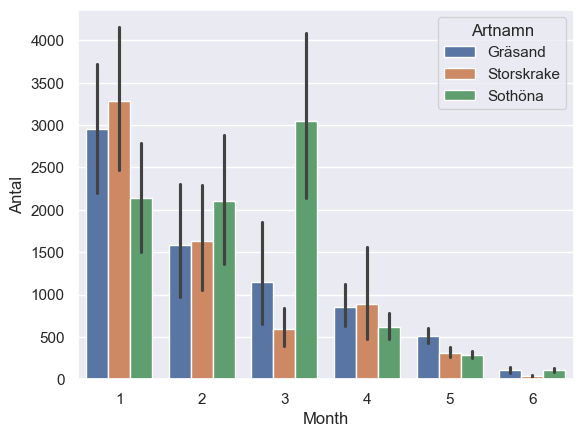

In [14]:
topart = art.loc[art["Artnamn"].isin(["Sothöna","Gräsand","Storskrake"])].copy().reset_index()
topart["Month"] = pd.to_datetime(topart["Startdatum"]).dt.month
sns.barplot(data =  topart, x = "Month", y = "Antal", hue = "Artnamn", estimator = "sum")

We can see that The distribution of all the species decreases from January to June, however there is a noticable increase in Sothöna specimens during march, as well as a noticable decrease in Storskrake in the same month. The low amount of sightings in June can be partially explained by our dataset ending in June, and thus all the data for that month may not be included.

Lastly we also want to know which species are the rarest, and for that we can look at the bottom of our earlier counting of the total number of sighted birds. The following printing are all the species that only one specimens has been sighted of in the dataset.

In [15]:
total_thou.loc[total_thou == 1]

Trädlärka                    1
Storlom                      1
Rosenfink                    1
Ormvråk, underarten buteo    1
Vinterhämpling               1
Varfågel                     1
Rödbena                      1
Ägretthäger                  1
Bivråk                       1
Strömstare                   1
Röd glada                    1
Fjällvråk                    1
Gravand                      1
Spillkråka                   1
Ejder                        1
Lappsparv                    1
Tornfalk                     1
Forsärla                     1
Bändelkorsnäbb               1
dtype: int32

One question we could ask is how bird sightings vary by month. Our data for June is likely incomplete, as discussed earlier, but our data for december is even less complete, so we'll opt to disregard those observations for the following plot.

<Axes: xlabel='Month'>

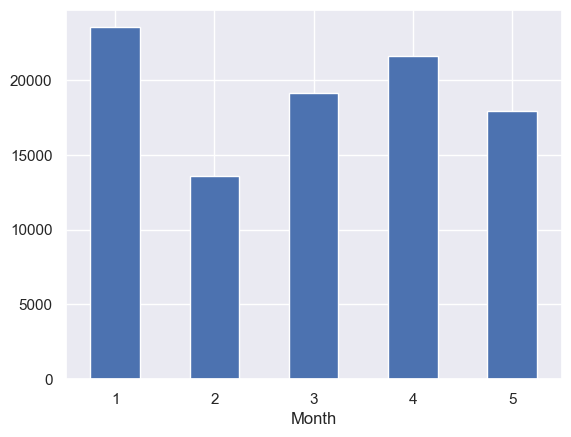

In [16]:
art["Month"] = pd.to_datetime(art["Startdatum"]).dt.month
art.loc[art["Antal"] < 1000]\
    .loc[(art["Month"] != 12) & (art["Month"] != 6)]\
    .groupby("Month")\
    .sum("Antal")\
    ["Antal"]\
    .plot.bar(rot = 0)

We see that most birds are sighted in January, followed by a sharp frop for February. There is also a peak in bird sightings during April. Since I'm no bird expert, I have no clue why this is the case in our data, but it is interesting nonetheless!

Something else we can look at is the redlisting status of the birds sighted

<Axes: xlabel='Rödlistade'>

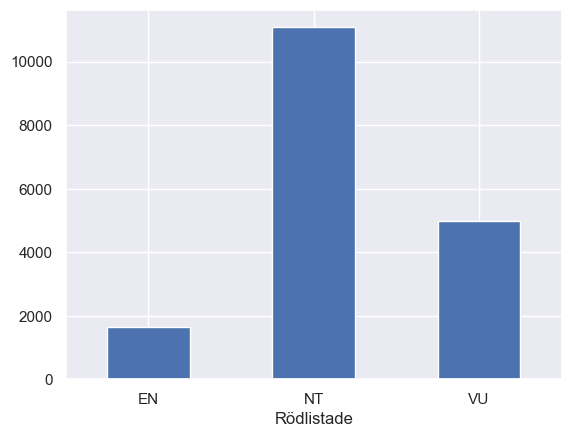

In [17]:
art.loc[art["Antal"] < 1000]\
    .groupby("Rödlistade")\
    .sum("Antal")\
    ["Antal"]\
    .plot.bar(rot = 0, stacked = True)

NT stands for "Near Threatened" and is the least severe redlisting possible, so it is reassuring that it is the most common of the three present. VU stands for "Vulnerable" and is less severe than NT but less severe than EN, which stands for "Endangered". We see that all three redlist categories have a precence reflecting their severity, so no category is strangely common or uncommon. It is also interesting that no critically endangeded (CR) birds were found. It is unclear whether this is because there aren't many critically endangered birds in the region, or because critically endangered animals naturally aren't seen very commonly.

Lastly, I was curious which people had the most observations. We can check this through a simple value count.

In [18]:
art.value_counts("Observatörer")

Observatörer
Svante Söderholm                              4505
Johan Nilsson                                 1605
jesper sollerman                               950
Virginia Kustvall Larsson, Folke K Larsson     611
Magnus Edberg                                  567
                                              ... 
Lena Freij                                       1
Lennart Didrik                                   1
Magnus Nilsson                                   1
Maj-Britt Oliw, Ernst-Hugo Oliw                  1
Karin Martinsson                                 1
Name: count, Length: 425, dtype: int64

Svante Söderholm, the same person behind the outliers we ignored earlier, seems to be the most prolific person in this dataset. This sheds some doubt on whether we should have removed those datapoints, but I still think that was the right call. I wonder what proportion of the data he was responsible for?

In [19]:
art.value_counts("Observatörer").sum()

19585

About one fourth!

## Predicting Strokes

Since this data was covered in homework 2, I will follow up on the analysis I did there. To recap, I was curious about how smoking status affected the likelihood of a stroke, which culminated in a barplot of the proportion of people that had strokes for each category of smoking status. Interesingly, "formerly smoked" had the highest proportion of stroke victims. This could be explained by smokers dying earlier, and therefore not having as much time to have a stroke, and non-smokers living longer, and having more time to have a stroke. I suggested that former smokers have a combination of life expectancy and health that increases the likelihood of stroke when ignoring age.

In [20]:
stroke = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/stroke-data.csv")
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<function matplotlib.pyplot.show(close=None, block=None)>

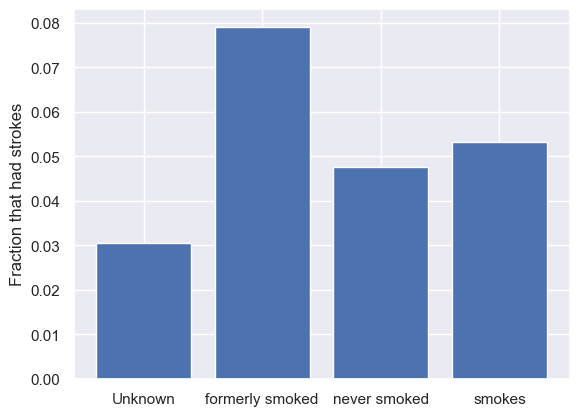

In [21]:
temp = stroke.value_counts(subset=["smoking_status","stroke"])

# indeces are sorted so we can calculate the fractions
temp1 = temp.loc[(slice(None), [0])].sort_index()
temp2 = temp.loc[(slice(None), [1])].sort_index()

plt.bar(
    ["Unknown", "formerly smoked", "never smoked", "smokes"],
    temp2.values/(temp1.values+temp2.values),
    
)
plt.ylabel("Fraction that had strokes")
plt.show

Now I will take a closer look at this data and plot the proportion by age. Seeing how many stroke viktims are of each category for each age. I'll also only be considering people of age 25+ to make the data easier to analyse

In [22]:
temp = stroke.value_counts(subset=["age","smoking_status","stroke"]).unstack()
temp = temp.query("age > 25")
temp = temp.query("smoking_status !=  'Unknown'")
temp.fillna(0, inplace = True)
temp["proportion"] = temp[1]/(temp[0]+temp[1])
temp

stroke                   0    1  proportion
age  smoking_status                        
26.0 formerly smoked   9.0  0.0    0.000000
     never smoked     29.0  0.0    0.000000
     smokes           16.0  0.0    0.000000
27.0 formerly smoked   5.0  0.0    0.000000
     never smoked     24.0  0.0    0.000000
...                    ...  ...         ...
81.0 never smoked     21.0  9.0    0.300000
     smokes            3.0  2.0    0.400000
82.0 formerly smoked  15.0  4.0    0.210526
     never smoked     19.0  3.0    0.136364
     smokes            5.0  1.0    0.166667

[171 rows x 3 columns]

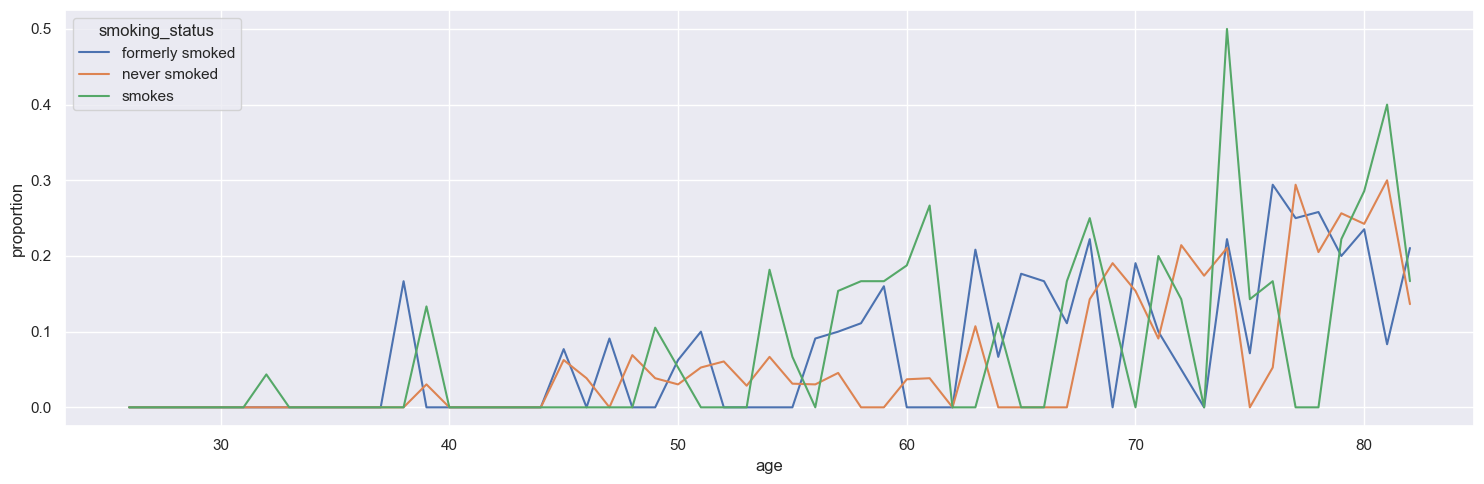

In [23]:
fig, ax = plt.subplots(figsize = (15,5))

sns.lineplot(data = temp, x = "age", y = "proportion", hue = "smoking_status", ax = ax)
fig.tight_layout()

In this plot the results of the bar graph don't seem to show. It doesn't look clear that the total proportion of former smokers is much higher than that of smokers, it seems to mainly come from the age group 77, where former smokers have a high proportion for multiple years. What is clear, however, is that non smokers have significantly less strokes until they are about 65.

I was curious about the effects of other conditions on stroke, so i did a similar bargraph as before, now based on whether the person has hypertension, heartdisiease, or both.

<Axes: >

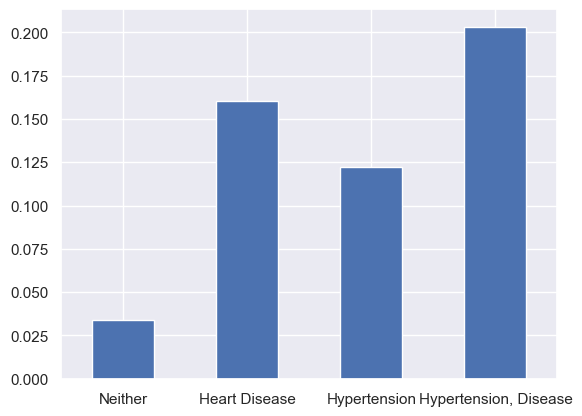

In [24]:
# check heart disease + hypertension
temp = stroke.value_counts(subset=["hypertension", "heart_disease","stroke"])

totals = {}
label = ""

for i in [0,1]:
    for j in [0,1]:
        if i == 0 and j == 0:
            label = "Neither"
        elif i == 1 and j == 1:
            label = "Hypertension, Disease"
        else:
            label = "Hypertension"*i + "Heart Disease"*j

        totals[label] = temp[i,j,1]/(temp[i,j,0]+temp[i,j,1])
        
totals = pd.Series(totals)
totals.plot.bar(rot = 0)

We can see that both heart disease and hyptertension leads to higher chance of stroke, as well as having a compounding effect (though not an additive one). Importantly having neither means a significantly lower risk of stroke. We can also see that heart disease has a slightly higher effect of stroke than hypertension by itself.

Lastly, I wanted to see how stroke chances vary by gender. I did another line plot by age.

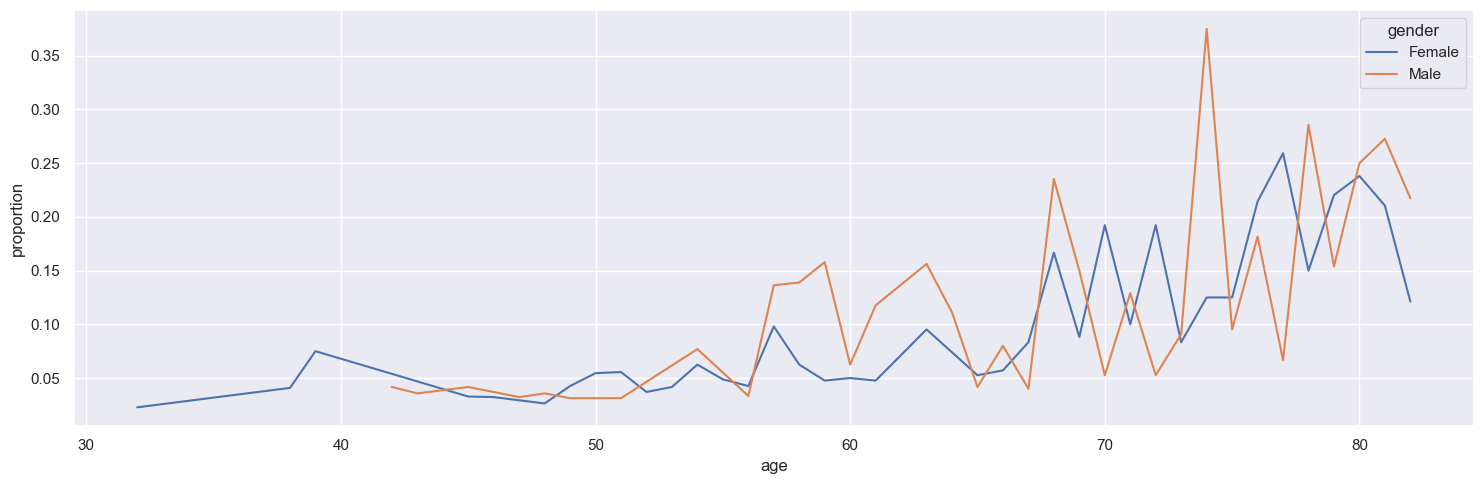

In [36]:
# check sex and age
temp = stroke.value_counts(subset=["gender", "age","stroke"])
# Other is not useful for our analysis
temp.drop(labels = "Other", level = 0, inplace = True)
temp = temp.unstack(level = 2)
# create another proportion variable
temp["proportion"] = temp[1]/(temp[0]+temp[1])
temp = temp.query("age > 30")
fig, ax = plt.subplots(figsize = (15,5))

sns.lineplot(data = temp, x = "age", y = "proportion", hue = "gender" , ax = ax)
fig.tight_layout()

We see very few strokes until age 55, where men get a noticably higher amount of strokes for a bit. Afterwards, both men and women have similar stroke rates, with neither gender overtaking the other by much, except for age 74, where men suddenly have a large spike in stroke cases. This seems like enough of an anomaly that it could likely be a result of variance.

# Data Gathering

## Cleaning data

First, we should get an overview of our dataset

In [28]:
cell = pd.read_csv("https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/cell_phones_total.csv")
cell.set_index("iso-3", inplace = True)
cell.head()

,1960,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
iso-3,,,,,,,,,,,,,,,,,,,,,
ABW,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,132k,NaN,135k,139k,140k,141k,NaN,NaN,NaN,NaN
AFG,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,10.2M,13.8M,15.3M,16.8M,18.4M,19.7M,21.6M,23.9M,22M,22.6M
AGO,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,9.4M,12.1M,12.8M,13.3M,14.1M,13.9M,13M,13.3M,13.3M,14.8M
ALB,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,2.69M,3.1M,3.5M,3.69M,3.36M,3.4M,3.37M,3.63M,2.71M,2.63M
AND,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,65.5k,65k,63.9k,63.9k,66.2k,71.3k,76.1k,80.3k,82.6k,87.9k


It seems that the highest concentration of missing values is in the early years. This can be confirmed by showing that these columns are filled with only 0 and NaN.

In [29]:
for col in cell:
    if len(cell[col].unique()) <= 2:
        print(col + ": " + str(cell[col].unique()))
        

1960: [ 0. nan]
1965: [ 0. nan]
1966: [nan]
1967: [nan]
1968: [nan]
1969: [nan]
1970: [ 0. nan]
1971: [nan]
1972: [nan]
1973: [nan]
1974: [nan]
1975: [ 0. nan]
1976: [ 0. nan]
1977: [ 0. nan]
1978: [ 0. nan]
1979: [ 0. nan]


Thus it is safe to assume that the missing values for these columns are just zeroes, which is easy to change

In [30]:
for col in cell:
    if len(cell[col].unique()) <= 2:
        cell[col].fillna(0, inplace= True)

Since many numbers are written as strings, we want to properly convert them to numbers. This will be done by making a funciton that takes the number part (ex `141`) and multiplying it by the size indicator (ex `"k" = 1000` ). Then I simply use the map function to apply my function on the dataframe.

In [31]:
def str_to_number(x, sizes = {"k" : 10**3, "K" : 10**3
                     , "m" : 10**6, "M": 10**6
                     , "b": 10**9, "B" : 10**9}):
    
    # Takes a number expressed in the form (number)(letter) and converts it into the corresponding number using the "sizes dictionary"
    
    num = re.match(r"[0-9\.]+" , str(x))
    l = re.search(r".$", str(x))
    
    # If both num and l are successful matches, we have a string of the correct form to convert
    if num and l:
        # accessing the strings we found
        num = num.group(0)
        l = l.group(0)
        
        # adding the results as a number
        if l in sizes.keys():
                return float(num) * sizes[l]
        else: 
                return float(num)

    else:
        return float(x)
        
def df_to_numbers(df):
    return df.map(str_to_number, na_action = "ignore")
    
cell = df_to_numbers(cell)
cell.head()

,1960,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
iso-3,,,,,,,,,,,,,,,,,,,,,
ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,132000.0,NaN,135000.0,139000.0,140000.0,141000.0,NaN,NaN,NaN,NaN
AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10200000.0,13800000.0,15300000.0,16800000.0,18400000.0,19700000.0,21600000.0,23900000.0,22000000.0,22600000.0
AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9400000.0,12100000.0,12800000.0,13300000.0,14100000.0,13900000.0,13000000.0,13300000.0,13300000.0,14800000.0
ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2690000.0,3100000.0,3500000.0,3690000.0,3360000.0,3400000.0,3370000.0,3630000.0,2710000.0,2630000.0
AND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65500.0,65000.0,63900.0,63900.0,66200.0,71300.0,76100.0,80300.0,82600.0,87900.0


Now we have to deal with the remaining missing values. To do this we can forward fill. That is to replace every missing value in a row with the last preceding value. This is prefferable to interpolating these points because We cannot reasonably make an assumtion about when a country started having cell phones, and interpolating would propogate pasitive values earlier than we would want.

In [32]:
cell.ffill(axis = 1, inplace = True)
cell.head()

,1960,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
iso-3,,,,,,,,,,,,,,,,,,,,,
ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,132000.0,132000.0,135000.0,139000.0,140000.0,141000.0,141000.0,141000.0,141000.0,141000.0
AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10200000.0,13800000.0,15300000.0,16800000.0,18400000.0,19700000.0,21600000.0,23900000.0,22000000.0,22600000.0
AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9400000.0,12100000.0,12800000.0,13300000.0,14100000.0,13900000.0,13000000.0,13300000.0,13300000.0,14800000.0
ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2690000.0,3100000.0,3500000.0,3690000.0,3360000.0,3400000.0,3370000.0,3630000.0,2710000.0,2630000.0
AND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65500.0,65000.0,63900.0,63900.0,66200.0,71300.0,76100.0,80300.0,82600.0,87900.0


Now we can make a nice table!

In [33]:
cell.loc[["CHN","IND","USA","IDN","BRA"],"2015":"2019"]

,2015,2016,2017,2018,2019
iso-3,,,,,
CHN,1.290000e+09,1.360000e+09,1.470000e+09,1.650000e+09,1.730000e+09
IND,1.000000e+09,1.130000e+09,1.170000e+09,1.180000e+09,1.150000e+09
USA,3.820000e+08,3.960000e+08,4.000000e+08,4.220000e+08,4.220000e+08
IDN,3.390000e+08,3.860000e+08,4.350000e+08,3.190000e+08,3.450000e+08
BRA,2.580000e+08,2.440000e+08,2.180000e+08,2.070000e+08,2.070000e+08
